In [1]:
!nvidia-smi

Fri Mar  1 01:55:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.3/716.3 kB 8.3 MB/s eta 0:00:00


In [3]:
!wget https://github.com/Abonia1/YOLOv8-Fire-and-Smoke-Detection/archive/refs/heads/main.zip

--2024-03-01 01:55:40--  https://github.com/Abonia1/YOLOv8-Fire-and-Smoke-Detection/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Abonia1/YOLOv8-Fire-and-Smoke-Detection/zip/refs/heads/main [following]
--2024-03-01 01:55:41--  https://codeload.github.com/Abonia1/YOLOv8-Fire-and-Smoke-Detection/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [                <=> ] 374.06M  25.2MB/s    in 16s     

2024-03-01 01:55:57 (23.1 MB/s) - ‘main.zip’ saved [392234562]



In [4]:
import zipfile
with zipfile.ZipFile('/content/main.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
!mv /content/YOLOv8-Fire-and-Smoke-Detection-main/datasets/fire-8 /content/

In [6]:
!pwd

/content


In [7]:
!rm -r /content/runs
!rm -r /content/YOLOv8-Fire-and-Smoke-Detection-main
!rm /content/main.zip

rm: cannot remove '/content/runs': No such file or directory


In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
model.train(data="/content/fire-8/data.yaml", epochs=25)  # train the model
#metrics = model.val()  # evaluate model performance on the validation set
#results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
#path = model.export(format="onnx")  # export the model to ONNX format


Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/fire-8/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 33.9MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 140MB/s]


AMP: checks passed ✅


train: Scanning /content/fire-8/train/labels... 877 images, 1 backgrounds, 0 corrupt: 100%|██████████| 877/877 [00:00<00:00, 2005.02it/s]

train: WARNING ⚠️ /content/fire-8/train/images/img_202_jpg.rf.def5560c0e7c53c30a7e4eed738c02cb.jpg: 1 duplicate labels removed
train: New cache created: /content/fire-8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/fire-8/valid/labels... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<00:00, 1692.85it/s]

val: New cache created: /content/fire-8/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.39G      3.054      3.847      4.145         34        640: 100%|██████████| 55/55 [00:22<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         47         48    0.00378      0.817     0.0135    0.00467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.27G      2.809      3.607      3.733         41        640: 100%|██████████| 55/55 [00:18<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         47         48    0.00367        0.8     0.0777     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.27G      2.419      3.465      3.193         34        640: 100%|██████████| 55/55 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         47         48     0.0905       0.15     0.0859     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.27G      2.214      3.244       2.92         43        640: 100%|██████████| 55/55 [00:17<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         47         48     0.0769      0.339      0.128     0.0392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.27G       2.06      3.024      2.744         36        640: 100%|██████████| 55/55 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         47         48      0.179        0.3      0.179     0.0645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.27G      1.882      2.849      2.587         41        640: 100%|██████████| 55/55 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         47         48      0.162      0.267      0.185     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.27G      1.777      2.675       2.44         37        640: 100%|██████████| 55/55 [00:17<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         47         48      0.184      0.378      0.254      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.27G      1.693      2.524      2.362         29        640: 100%|██████████| 55/55 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         47         48      0.356      0.394      0.359      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.27G      1.649       2.43      2.299         35        640: 100%|██████████| 55/55 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         47         48      0.283      0.389      0.274      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.27G      1.607       2.31      2.229         33        640: 100%|██████████| 55/55 [00:17<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         47         48      0.375      0.426      0.375      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.27G      1.539      2.182      2.145         33        640: 100%|██████████| 55/55 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         47         48      0.632      0.411      0.449      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.29G      1.463      2.143      2.093         43        640: 100%|██████████| 55/55 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         47         48      0.451        0.5      0.409      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.27G      1.449      2.113      2.074         34        640: 100%|██████████| 55/55 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         47         48      0.397      0.381      0.432      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.27G      1.401      2.036      2.034         28        640: 100%|██████████| 55/55 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         47         48      0.619       0.42      0.512      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.27G       1.37      1.992      1.982         35        640: 100%|██████████| 55/55 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         47         48      0.472      0.467      0.482       0.23


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.41G      1.357      1.956      2.234         15        640: 100%|██████████| 55/55 [00:18<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         47         48        0.6      0.511      0.601      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.27G      1.292      1.762      2.122         15        640: 100%|██████████| 55/55 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         47         48      0.629      0.428      0.533      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.27G      1.285      1.635      2.102         15        640: 100%|██████████| 55/55 [00:16<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         47         48      0.588      0.531       0.53      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.27G      1.245      1.545      2.072         13        640: 100%|██████████| 55/55 [00:16<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         47         48      0.537      0.623      0.566      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.27G      1.237      1.525      2.041         16        640: 100%|██████████| 55/55 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         47         48      0.636      0.567      0.661       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.27G        1.2      1.491      2.009         14        640: 100%|██████████| 55/55 [00:16<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


                   all         47         48      0.499      0.589       0.54      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.27G      1.171      1.428      2.001         14        640: 100%|██████████| 55/55 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         47         48      0.656      0.584      0.596      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.27G      1.157      1.388      1.957         15        640: 100%|██████████| 55/55 [00:16<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         47         48      0.631      0.584       0.58       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.27G      1.138      1.351      1.944         13        640: 100%|██████████| 55/55 [00:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         47         48      0.687      0.644      0.666      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.27G      1.106      1.306      1.923         13        640: 100%|██████████| 55/55 [00:16<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         47         48      0.722      0.644      0.659      0.341



25 epochs completed in 0.135 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]


                   all         47         48       0.69      0.644      0.666      0.344
                  Fire         47         18      0.649      0.556      0.538      0.247
                 smoke         47         30      0.731      0.733      0.793       0.44
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b48cc45cbe0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [10]:
metrics = model.val()

Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/fire-8/valid/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]


                   all         47         48      0.687      0.644      0.665      0.343
                  Fire         47         18      0.647      0.556      0.537      0.246
                 smoke         47         30      0.728      0.733      0.793       0.44
Speed: 0.3ms preprocess, 16.6ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/train22


In [11]:
from IPython.display import display, Image

In [14]:
results = model("/content/fire-8/test/images")


image 1/55 /content/fire-8/test/images/fire1_mp4-26_jpg.rf.5a09c11c9facf23a9413ca63bc2a6085.jpg: 640x640 1 Fire, 12.7ms
image 2/55 /content/fire-8/test/images/fire2_mp4-29_jpg.rf.42a82dddeb68db98ca428fdf902c9e66.jpg: 640x640 (no detections), 12.8ms
image 3/55 /content/fire-8/test/images/fire2_mp4-37_jpg.rf.742a554b0f0772dc0fb772be8648477c.jpg: 640x640 1 Fire, 13.1ms
image 4/55 /content/fire-8/test/images/fire2_mp4-50_jpg.rf.07b08a19a25759f464ebccd1158f1d23.jpg: 640x640 2 Fires, 8.6ms
image 5/55 /content/fire-8/test/images/fire2_mp4-51_jpg.rf.09ddf16d6c4c8117c7a4a5f26f796a44.jpg: 640x640 2 Fires, 7.3ms
image 6/55 /content/fire-8/test/images/fire2_mp4-56_jpg.rf.1e9523e7b497838a4e40d80da90084d6.jpg: 640x640 (no detections), 7.3ms
image 7/55 /content/fire-8/test/images/fire2_mp4-59_jpg.rf.bfb4094aaa6edee1338797863badb4e1.jpg: 640x640 1 Fire, 8.0ms
image 8/55 /content/fire-8/test/images/fire2_mp4-62_jpg.rf.8a5e98819f46ed6519fb1c06cbc2a44c.jpg: 640x640 1 Fire, 8.1ms
image 9/55 /content/fire

In [15]:
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps

array([    0.24635,     0.34303,     0.43971])

In [20]:
print(len(results))

55


In [24]:
result = results[3]
boxes = result.boxes  # Boxes object for bounding box outputs
masks = result.masks  # Masks object for segmentation masks outputs
keypoints = result.keypoints  # Keypoints object for pose outputs
probs = result.probs  # Probs object for classification outputs
result.show()  # display to screen
result.save(filename='result.jpg')

'result.jpg'

In [19]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    result.save(filename='result.jpg')
    break

In [25]:
model.export(format='onnx')

Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 87.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.7s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 11.5s, saved as 'runs/detect/train2/weights/best.onnx' (11.7 MB)

Export complete (13.4s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train2/weights/best.onnx imgsz=640 data=/content/fire-8/data.yaml  
Visu

'runs/detect/train2/weights/best.onnx'

In [27]:
from IPython.display import display, Image

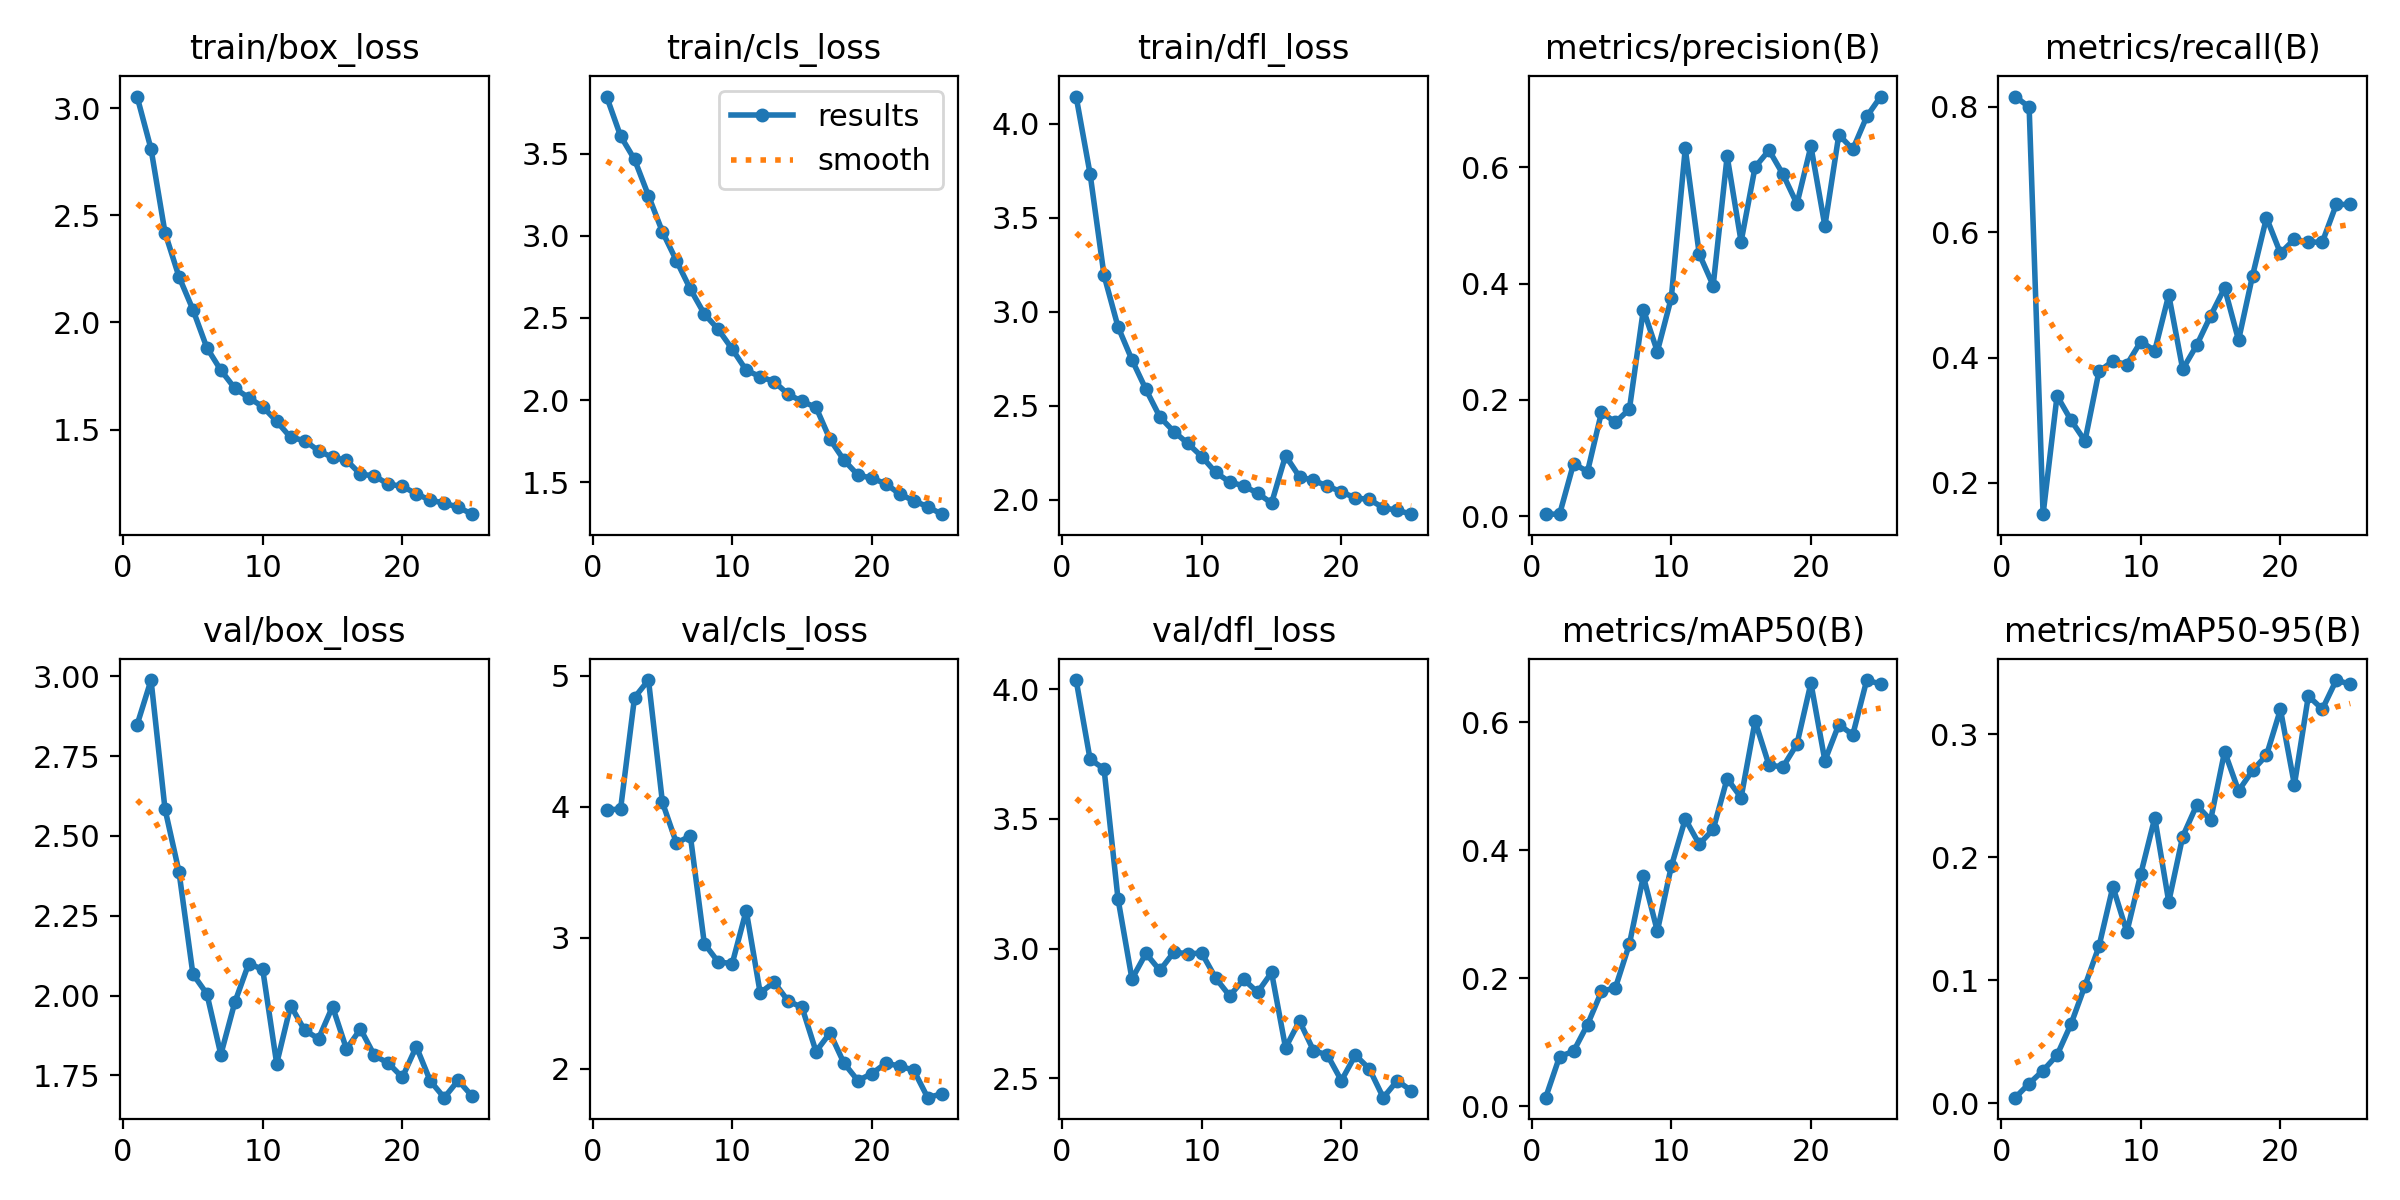

In [28]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

In [32]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [35]:
!cp -r /content/fire-8 /content/drive/MyDrive/FireDetection/Data

In [36]:
!cp -r /content/runs /content/drive/MyDrive/FireDetection/

In [37]:
!cp /content/result.jpg /content/drive/MyDrive/FireDetection/